<a href="https://colab.research.google.com/github/romanodev/OpenBTE/blob/master/openbte/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Initialization
!apt-get -qq install -y libopenmpi-dev libgmsh-dev
!pip install -q --no-cache --upgrade git+https://github.com/romanodev/OpenBTE.git
!pip install -q pyqt5
%matplotlib inline
from openbte import Material,Geometry,Solver,Plot

# 1) Fourier's law: The "Hello World!" of heat transport

In this example we show how OpenBTE can be used for solving diffusive heat conduction, a task that is done routinely with packages like COMSOL MULTIPHYSICS. The equation to be solved is $$-\kappa \nabla^2 T = 0, $$ along with boundary conditions. 


When solving the heat conduction equation, only the thermal conductivity is needed. We specify it by defining the material object:

In [0]:
Material(kappa_bulk=[150]);

The thermal conductivity value is 150 W/m/K. We define a porous geometry with aligned square pores

In [0]:
geo = Geometry(model='porous/square_lattice',lx = 10,ly = 10,porosity=0.15,step=0.5);

The size of the unit cell is 10 nm by 10 nm. For simple diffusion calculations the size should not matter. Also we define the porosity and the mesh size. To plot the structures we use the following method

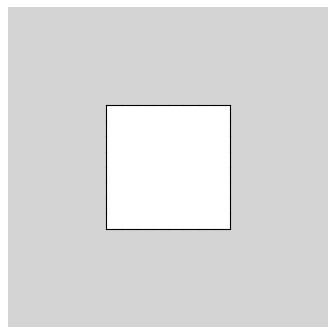

In [0]:
geo.plot_polygons(show=True,plot_boundary=True);

Finally, we solve Fourier's law with this command

In [0]:
Solver(only_fourier=True);

The heat flux is then obtained by

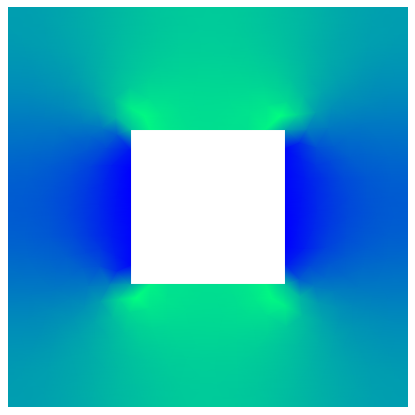

In [0]:
Plot(variable='map/flux_fourier');

# 2) Custom Geometries

In this example, we will learn how to calculated thermal transport in custom geometries. We choose Si as a base material.

The first step is building a `Material` object. OpenBTE comes with some precomputed bulk MFP distributions, obtained by [AlmaBTE](http://www.almabte.eu/). In this case we use silicon at 300 K

In [0]:
Material(filename='Si-300K.dat',n_mfp=50);

Next, we need to build the `Geometry` object. OpenBTE has several packages to facilitate geometry creation. Here we use `porous/custom`

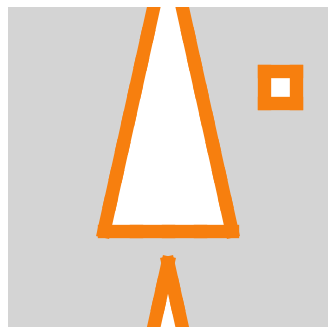

In [0]:
geo = Geometry(model='porous/custom', lx=100, ly=100, step=10,polygons=[[ 0.3, 0.3 ,0.7 ,0.3 ,0.5 ,1.2],[0.8,0.7,0.9,0.7,0.9,0.8,0.8,0.8]])
geo.plot_polygons(plot_boundary=True)

Blue lines refer to periodic boundary conditions while orange lines are diffuse surface. The coordindates in polygons refer to a square of [0,1]X[0,1]. If a coordindate falls outside this domain, it will be automatically created on the opposite side. The format is `[[x0,y0,x1,y1...][x0,y0,x1,y1...],...]` To have diffuse scattering along the y-axis, then you have to add the `Periodic` flag

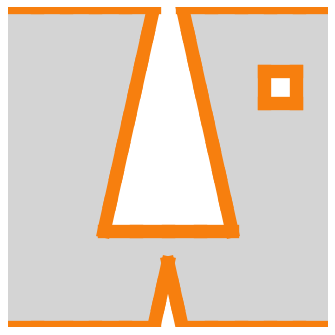

In [0]:
geo = Geometry(model='porous/custom', lx=100, ly=100, step=10,polygons=[[ 0.3, 0.3 ,0.7 ,0.3 ,0.5 ,1.2],[0.8,0.7,0.9,0.7,0.9,0.8,0.8,0.8]],Periodic=[True,False,True])
geo.plot_polygons(plot_boundary=True)

By default, the applied gradient is enforced along x. If you want to apply a gradient along y, then add the flag `direction="y" `. If non-periodic boundary conditions are applied along the applied gradient, then (experimental) the two surfaces are thermostatting. Let's now run the simulation. 

In [0]:
Solver(max_bte_error=1e-2);

 
  ___                   ____ _____ _____ 
 / _ \ _ __   ___ _ __ | __ )_   _| ____|
| | | | '_ \ / _ \ '_ \|  _ \ | | |  _|  
| |_| | |_) |  __/ | | | |_) || | | |___ 
 \___/| .__/ \___|_| |_|____/ |_| |_____|
      |_|                                

Giuseppe Romano [romanog@mit.edu]
 
 
Space DOFs:      250
Momentum DOFs:   2400
 
Kappa bulk: 
  158.07 W/m/K
 
    Iter    Thermal Conductivity [W/m/K]      Error        Diffusive  -  BTE  -  Ballistic
   ---------------------------------------------------------------------------------------
       1           3.9150E+01                1.0000E+00       1.00       0.00       0.00
       2           1.0070E+01                7.4279E-01       0.00       1.00       0.00
       3           8.0592E+00                1.9968E-01       0.00       1.00       0.00
       4           7.8034E+00                3.1742E-02       0.00       1.00       0.00
       5           7.4950E+00                3.9521E-02       0.00       1.00       0.00
     

Note that in the simulation above the algorithm stops because it reaches the max number of steps. To increase this parameter, use `mat_bte_iter=100'. Let's now plot the magnitude of thermal flux

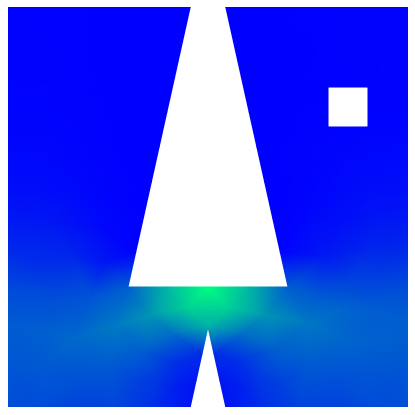

In [0]:
Plot(variable='map/flux');

Note that in the current version it is recommended to use shapes whose sides have normal that has an angle with the x axis multiple of 2 $\pi$ / 48. This limitation (which hasn't been checked in this example) arises from angle discretization and will be fixed in the future. 

# 3) Disordered Nanoporous


In this example, we will calculate thermal transport in disordered Si membranes.


The first step is building a `Material` object. OpenBTE comes with some precomputed bulk MFP distributions, obtained by [AlmaBTE](http://www.almabte.eu/). In this case we use silicon at 300 K

In [0]:
Material(filename='Si-300K.dat',n_mfp=50);

Next, we need to build the `Geometry` object. OpenBTE has several packages to facilitate geometry creation. Here we use `porous/square_lattice`

In [0]:
geo = Geometry(model='porous/random', lx=100, ly=100, step=10,shape='square',Np=10, porosity=0.3,overlap=True,add_periodic=True)
geo.tt

We choose a porosity of 0.3, a periodicity of 100 nm and a mesh size of about 10 nm. Note that to run this example in this Notebook, we recommend keeping the number of elements below one thousand. Note that although not explicitely simulated, the thickness of the sample is considered infinite. Now it's time to run the simulation (it should take around 10 minutes). 

In [0]:
Solver(max_bte_error=1e-2);

By default, the applied temperature difference is 1 K. 

With the module `Plot` we can plot relevant quantities. The temperature map can be visualized with this command

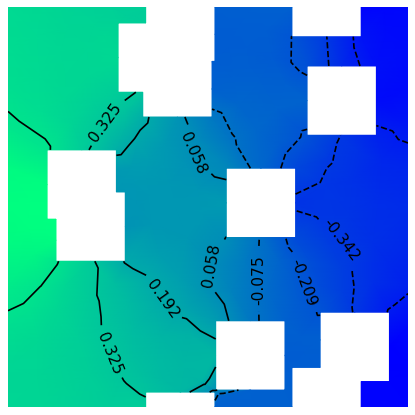

In [0]:
Plot(variable='map/temperature',iso_values=True);

Note that the actual plotted quantity is the deviation from 300 K. Lastly, we plot the cumulative thermal conductivity in the nanostructure

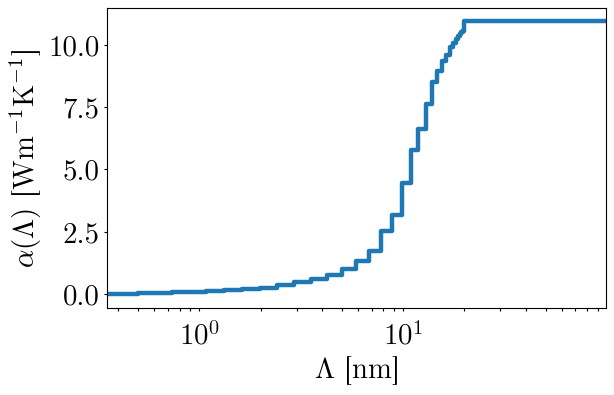

In [0]:
Plot(variable='distribution',show=True);

We remind that the cumulative thermal conductivity is given by $\alpha(\Lambda)=\int_0^\Lambda K(\Lambda')d\Lambda' $, where $K(\Lambda)$ and $\Lambda$ refer to the nanostructure case.

# 4) Pores Lattice 

In this example we will see how to construct custom pore lattices using theg ray Model as a base material.

For simplicity, we use the gray model, which assumes only a single MFP, provided by the user. This is the corresponding `Material` instance:

In [0]:
Material(kappa_bulk=[1],mfp_bulk = [10]);

Where the MFP is 10 m, and the bulk thermal conductivity is 1 W/m/K. The custom pores lattice can be defined with this `Geometry' instance

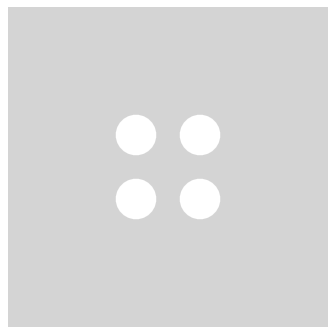

In [0]:
geo = Geometry(model='porous/square_lattice',base=[[0.6,0.4],[0.4,0.6],[0.4,0.4],[0.6,0.6]],lx=100, ly=100, step=10,shape='circle',porosity=0.05)
geo.plot_polygons(show=True);

where `base` is [[x0,y0],[x1,y1],...]

Let's now run the simulation

In [0]:
Solver();

 
  ___                   ____ _____ _____ 
 / _ \ _ __   ___ _ __ | __ )_   _| ____|
| | | | '_ \ / _ \ '_ \|  _ \ | | |  _|  
| |_| | |_) |  __/ | | | |_) || | | |___ 
 \___/| .__/ \___|_| |_|____/ |_| |_____|
      |_|                                

Giuseppe Romano [romanog@mit.edu]
 
 
Space DOFs:      1392
Momentum DOFs:   4800
 
Kappa bulk: 
    1.00 W/m/K
 
    Iter    Thermal Conductivity [W/m/K]      Error        Diffusive  -  BTE  -  Ballistic
   ---------------------------------------------------------------------------------------
       1           9.0334E-01                1.0000E+00       1.00       0.00       0.00
       2           9.0322E-01                1.3375E-04       0.00       1.00       0.00
   ---------------------------------------------------------------------------------------
 


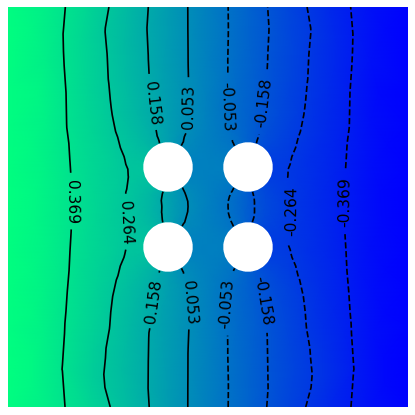

In [0]:
Plot(variable='map/temperature',iso_values=True); #Temperature with BTE

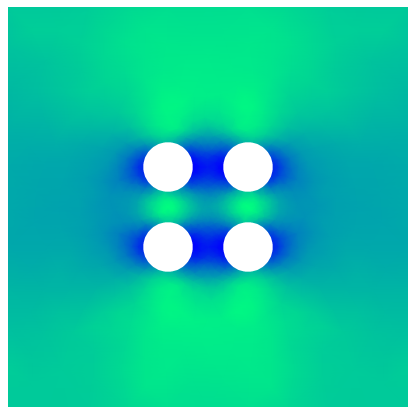

In [0]:
Plot(variable='map/flux');#Flux with BTE

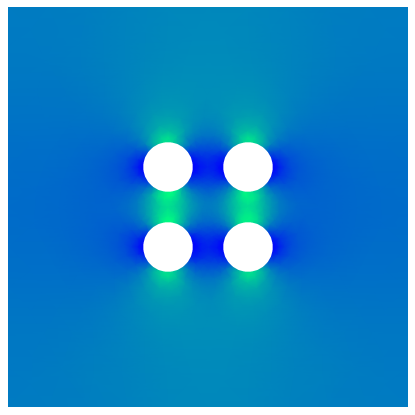

In [0]:
Plot(variable='map/flux_fourier');#Flux with Fourier

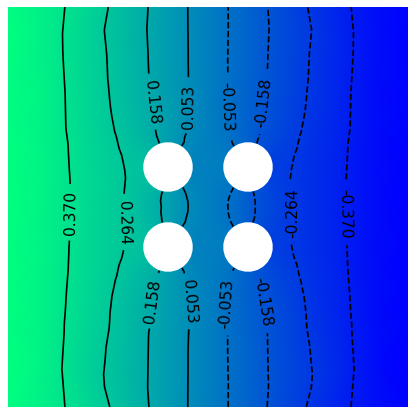

In [0]:
Plot(variable='map/temperature_fourier',iso_values=True);#Flux with Fourier

Let's now increase the MFP value to 100 nm

In [0]:
Material(kappa_bulk=[1],mfp_bulk = [100]);

In [0]:
Solver();

 
  ___                   ____ _____ _____ 
 / _ \ _ __   ___ _ __ | __ )_   _| ____|
| | | | '_ \ / _ \ '_ \|  _ \ | | |  _|  
| |_| | |_) |  __/ | | | |_) || | | |___ 
 \___/| .__/ \___|_| |_|____/ |_| |_____|
      |_|                                

Giuseppe Romano [romanog@mit.edu]
 
 
Space DOFs:      1392
Momentum DOFs:   4800
 
Kappa bulk: 
    1.00 W/m/K
 
    Iter    Thermal Conductivity [W/m/K]      Error        Diffusive  -  BTE  -  Ballistic
   ---------------------------------------------------------------------------------------
       1           9.0334E-01                1.0000E+00       1.00       0.00       0.00
       2           6.7732E-01                2.5020E-01       0.00       1.00       0.00
       3           5.4572E-01                1.9431E-01       0.00       1.00       0.00
       4           5.3616E-01                1.7518E-02       0.00       1.00       0.00
       5           5.2559E-01                1.9701E-02       0.00       1.00       0.00
    

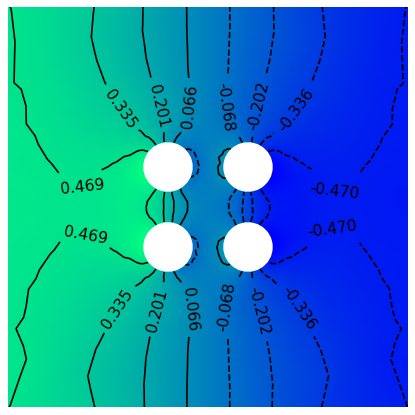

In [0]:
Plot(variable='map/temperature',iso_values=True);

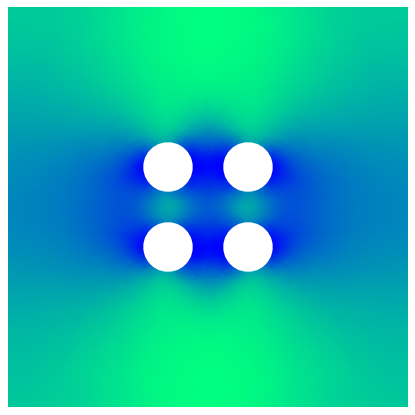

In [0]:
Plot(variable='map/flux');